<a href="https://colab.research.google.com/github/Fonseca-BrunoC/Modelo-Batelada-e-Mi-constante-/blob/main/Crescimento_microbiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Definindo mi a partir de dados experimentais***



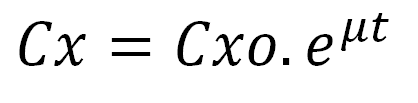

In [ ]:
from IPython.display import Image
Image(filename='eqmodelo1.PNG')

In [ ]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [ ]:
#Importando os dados do excel
df = pd.read_excel("/content/Dados sc.xlsx") 
data = df.to_numpy() #Covertendo os dados em np
#Definindo os eixos
x = data[:,0]
y = data[:,1]
print(x)
print(y)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30.]
[0.1   0.125 0.237 0.386 0.722 1.458 3.599 4.225 5.561 5.923 6.242 6.811
 6.965 7.461 7.678 8.235]


O microrganismo estudado no caso será a *Saccharomyces cerevisiae*. 

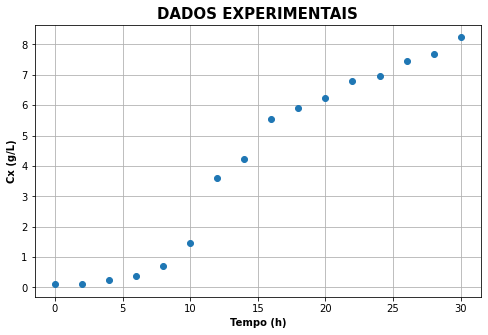

In [ ]:
#Plotando os dados experimentais
f = plt.figure()     
ax = f.add_subplot(111)  
plt.rc('axes', titlesize=15)     
plt.rc('axes', labelsize=10)   
Dados = ax.plot(x,y, 'o', label='Dados')
ax.set_title("DADOS EXPERIMENTAIS", weight ='bold')  
ax.set_xlabel('Tempo (h)',weight='bold')               
ax.set_ylabel('Cx (g/L)', weight='bold')
ax.grid(True)  
f.set_figheight(5)                                                 
f.set_figwidth(8)          
plt.show()

*Para tentar chegar à um valor de mi, será feito a linearização da equação de crescimento microbiano. Onde mi será equivalente ao coeficiente angular da reta formada.*

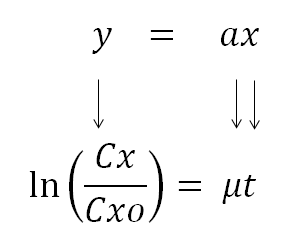

In [ ]:
from IPython.display import Image
Image(filename='eqmodelo2.PNG')

In [ ]:
#Ajustando a reta
y1 = np.log(y/y[0])
print(x)
print(y1)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30.]
[0.         0.22314355 0.86288996 1.35066718 1.97685495 2.67965073
 3.58324112 3.74360435 4.01836304 4.08142817 4.13388574 4.22112405
 4.2434827  4.31227455 4.34094419 4.41097846]


In [ ]:
#Criando o modelo da reta 
a, b, r, p_value, std_err = stats.linregress(x, y1) 

mod_y = a * x + b

In [ ]:
print('O coeficiente angular da reta é {:.4f}'.format(a))
print('O coeficiente linear da reta é {:.4f}'.format(b))
print('O coeficiente de determinação é {:.4f}'.format(r**2))

O coeficiente angular da reta é 0.1533
O coeficiente linear da reta é 0.7126
O coeficiente de determinação é 0.8388


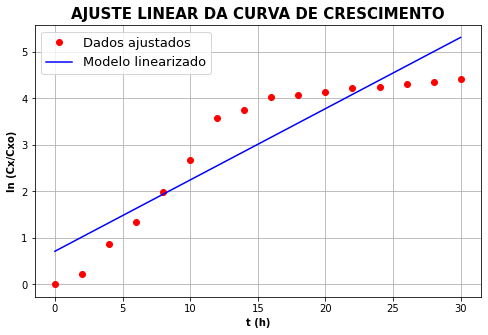

In [ ]:
#Plotando o modelo ajustado
f1 = plt.figure()     
ax1 = f1.add_subplot(111)
plt.rc('axes', titlesize=15)     
plt.rc('axes', labelsize=10)
l1 = ax1.plot(x, y1, marker ='o',color = 'red', label = 'Dados ajustados', linestyle = '')
l2 = ax1.plot(x, mod_y, color = 'blue', label = 'Modelo linearizado')
ax1.set_title("AJUSTE LINEAR DA CURVA DE CRESCIMENTO", weight ='bold')  
ax1.set_xlabel('t (h)',weight='bold')               
ax1.set_ylabel('ln (Cx/Cxo)', weight='bold')
plt.rc('legend', fontsize=13) 
ax1.legend()
ax1.grid(True)
f1.set_figheight(5)                                                 
f1.set_figwidth(8)
plt.savefig('Modelo_linear_Crescimento_celular', dpi=400)
plt.show()

Como mostrado tanto pelo gráfico, quanto pelo coeficiente de determinação, a reta não se ajustou bem aos dados. Isto se deve pois durante a linearização, foi considerado a fase estacionária da *Saccharomyces cerevisiae*, afetando assim o modelo da reta.

A fim de corrigir isso, foi feito um novo ajuste linear considerando somente as fases de crescimento lag e log.  

In [ ]:
y2 = y[0:9]
x2 = x[0:9]
y2 = np.log(y2/y2[0])
print(x2)
print(y2)
#Criando o modelo da reta 
a2, b2, r2, p_value2, std_err2 = stats.linregress(x2, y2) 

mod_y2 = a2 * x2 + b2 
print('O coeficiente angular da reta é {:.4f}'.format(a2))
print('O coeficiente linear da reta é {:.4f}'.format(b2))
print('O coeficiente de determinação é {:.4f}'.format(r2**2))

[ 0.  2.  4.  6.  8. 10. 12. 14. 16.]
[0.         0.22314355 0.86288996 1.35066718 1.97685495 2.67965073
 3.58324112 3.74360435 4.01836304]
O coeficiente angular da reta é 0.2784
O coeficiente linear da reta é -0.1783
O coeficiente de determinação é 0.9823


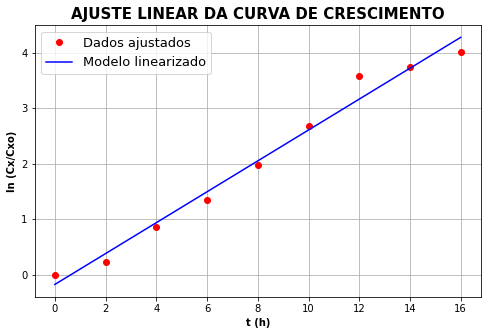

In [ ]:
#Plotando o modelo ajustado
f2 = plt.figure()     
ax2 = f2.add_subplot(111)
plt.rc('axes', titlesize=15)     
plt.rc('axes', labelsize=10)
l3 = ax2.plot(x2, y2, marker ='o',color = 'red', label = 'Dados ajustados', linestyle = '')
l4 = ax2.plot(x2, mod_y2, color = 'blue', label = 'Modelo linearizado')
ax2.set_title("AJUSTE LINEAR DA CURVA DE CRESCIMENTO", weight ='bold')  
ax2.set_xlabel('t (h)',weight='bold')               
ax2.set_ylabel('ln (Cx/Cxo)', weight='bold')
plt.rc('legend', fontsize=13) 
ax2.legend()
ax2.grid(True)
f2.set_figheight(5)                                                 
f2.set_figwidth(8)
plt.savefig('Modelo_linear_Crescimento_celular', dpi=400)
plt.show()

Agora, é possível avaliar tanto pelo gráfico, quanto pelo coeficiente de determinação, que o ajuste se encaixou bem, resultando em **mi = 0,2784/h**. 